In [ ]:
import os

In [ ]:
import cv2

In [ ]:
categories = ['with_mask', 'without_mask']

In [55]:
data = []
y = []
for category in categories:
    path = os.path.join('dataset', category)

    label = categories.index(category)
    for file in os.listdir(path):
        img_path = os.path.join(path, file)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (224, 224))

        data.append(img)
        y.append(label)

In [56]:
import numpy as np

In [57]:
X = np.array(data)
y = np.array(y)

In [58]:
X.shape

(4095, 224, 224, 3)

In [59]:
y.shape

(4095,)

In [60]:
X = X/255

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [62]:
X_train.shape

(3480, 224, 224, 3)

In [63]:
from keras.applications import MobileNetV2

In [64]:
mobile = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

In [65]:
mobile.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_4[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [67]:
from keras.layers import AveragePooling2D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Input

In [77]:
# construct the head of the model that will be placed on top of the the base model
headModel = mobile.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [78]:
from keras.models import Model

In [79]:
model = Model(inputs=mobile.input, outputs=headModel)

In [80]:
for layer in mobile.layers:
	layer.trainable = False

In [81]:
from keras.optimizers import Adam

In [82]:
print("[INFO] compiling model...")
model.compile(loss="binary_crossentropy", optimizer='Adam',
	metrics=["accuracy"])

print("Done !!")

[INFO] compiling model...
Done !!


In [83]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 107s 891ms/step - accuracy: 0.8935 - loss: 0.2291 - val_accuracy: 0.9724 - val_loss: 0.0723
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 89s 815ms/step - accuracy: 0.9798 - loss: 0.0571 - val_accuracy: 0.9886 - val_loss: 0.0392
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 88s 809ms/step - accuracy: 0.9910 - loss: 0.0300 - val_accuracy: 0.9805 - val_loss: 0.0428
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 84s 767ms/step - accuracy: 0.9933 - loss: 0.0197 - val_accuracy: 0.9870 - val_loss: 0.0346
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 81s 747ms/step - accuracy: 0.9909 - loss: 0.0251 - val_accuracy: 0.9919 - val_loss: 0.0201
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 756ms/step - accuracy: 0.9987 - loss: 0.0102 - val_accuracy: 0.9902 - val_loss: 0.0272
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 82s 754ms/step - accuracy: 0.9955 - loss: 0.0147 - val_accuracy: 0.9886 - val_loss: 0.0246
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 83s 765ms/step - accuracy: 0.9990 - loss: 

In [84]:
import matplotlib.pyplot as plt

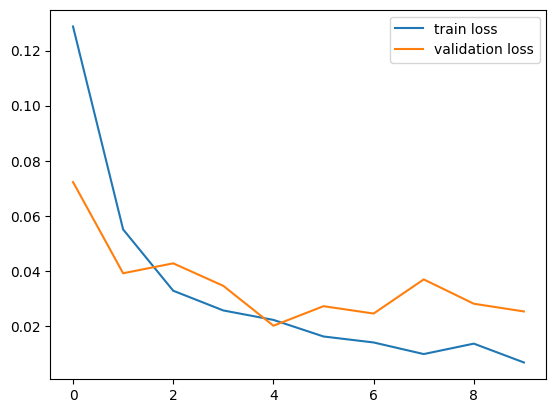

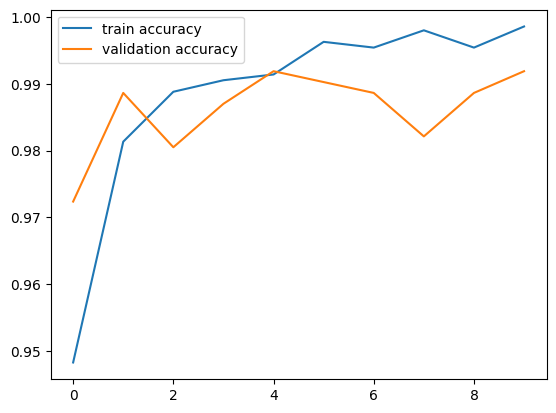

In [85]:
h = history

# Plotting the loss value

plt.plot(h.history['loss'], label='train loss')

plt.plot(h.history['val_loss'], label='validation loss')

plt.legend()

plt.show()


# Plotting the accuracy value

plt.plot(h.history['accuracy'], label='train accuracy')

plt.plot(h.history['val_accuracy'], label='validation accuracy')

plt.legend()

plt.show()

In [86]:
model.save("mask_detector_mobilenet.h5")